In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('houseprice.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# BsmtQual          37
# BsmtCond          37
# BsmtExposure      38
# BsmtFinType1      37
# BsmtFinType2      38

In [9]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [10]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [11]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [12]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [13]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [7]:
df['BsmtQual'].fillna('No Basement',inplace=True)
df['BsmtCond'].fillna('No Basement',inplace=True)
df['BsmtExposure'].fillna('No Basement',inplace=True)
df['BsmtFinType1'].fillna('No Basement',inplace=True)
df['BsmtFinType2'].fillna('No Basement',inplace=True)

In [8]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
# GarageType        81
# GarageYrBlt       81
# GarageFinish      81
# GarageQual        81
# GarageCond        81

In [16]:
df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [17]:
df['GarageCond'].fillna('TA',inplace=True)
df['GarageQual'].fillna('TA',inplace=True)
df['GarageFinish'].fillna('Unf',inplace=True)
df['GarageType'].fillna('Attchd',inplace=True)
df['GarageYrBlt'].fillna(2005.0,inplace=True)

In [19]:
df.shape

(1460, 81)

In [18]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

LotFrontage     259
Alley          1369
MasVnrType        8
MasVnrArea        8
Electrical        1
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [20]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [21]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu    690
dtype: int64

In [23]:
print(df['LotFrontage'].value_counts())
print('*'*40)
print(df['FireplaceQu'].value_counts())

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
****************************************
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [25]:
print(df['LotFrontage'].mean(),df['LotFrontage'].median())

70.04995836802665 69.0


In [27]:
df['FireplaceQu'].fillna('Gd',inplace=True)
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [29]:
df.shape

(1460, 77)

In [28]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

MasVnrType    8
MasVnrArea    8
Electrical    1
dtype: int64

In [30]:
df.dropna(inplace=True)

In [31]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

In [32]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [34]:
df.drop("Id",inplace=True,axis=1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

#### Feature Selection using Correlation
1) It gives the maginitude and direction of linear relationship between 2 variables<br>
2) It is a square matrix, the shape is decided by the number of features. <br>
3) It ranges form -1 to +1<br>
4) If 

    corr(x,y) = +ve
    a) if x increases => y also increases
    b) if x decreases => y also decreases
    corr(x,y) = -ve
    a) if x increases => y decreases
    b) if x decreases => y increases
    
5) Note<br>

    corr(x,y) = corr(y,x)
    corr(x,x) = corr(y,y) = 1
    

In [35]:
corr = df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.355068,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,-0.066037,...,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.355068,1.000000,0.304694,0.233277,-0.053026,0.116365,0.082885,0.179537,0.215778,0.042811,...,0.074495,0.134766,0.010728,0.062188,0.037974,0.181300,-0.000184,0.009784,0.007310,0.333206
LotArea,-0.138039,0.304694,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,0.111674,...,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,0.034799,0.233277,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,-0.058211,...,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,-0.061147,-0.053026,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,0.039234,...,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,0.027979,0.116365,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,-0.047609,...,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,0.040664,0.082885,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,-0.066485,...,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,0.023156,0.179537,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,-0.072443,...,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.069241,0.215778,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,-0.049498,...,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995
BsmtFinSF2,-0.066037,0.042811,0.111674,-0.058211,0.039234,-0.047609,-0.066485,-0.072443,-0.049498,1.000000,...,0.067684,0.004155,0.036680,-0.030211,0.088430,0.041597,0.004784,-0.014977,0.031880,-0.010350


In [36]:
import seaborn as sns

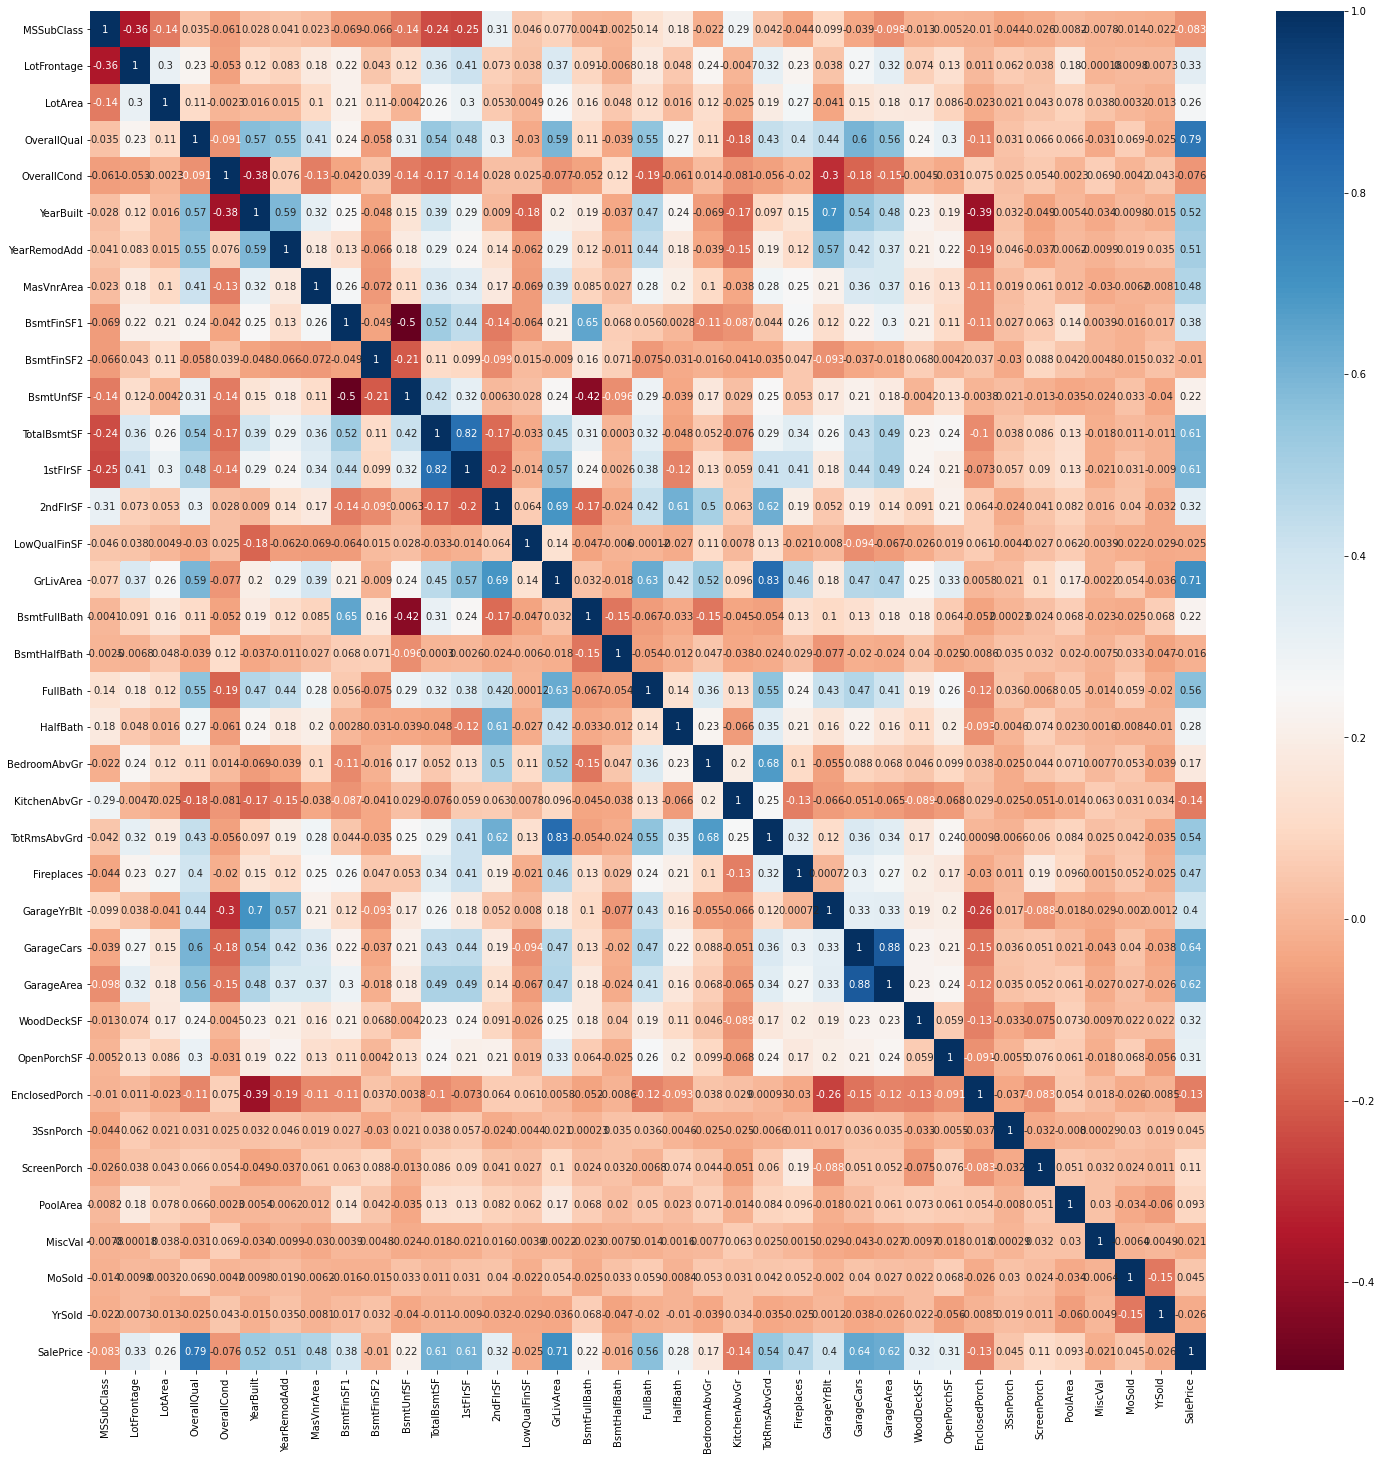

In [38]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [44]:
r1 = df['BsmtQual'].value_counts()
r1

TA             648
Gd             611
Ex             120
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [46]:
648/(648+611+120+37+35)

0.44658855961405924

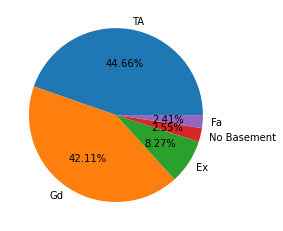

In [45]:
plt.pie(r1.values,labels=r1.index,autopct='%.2f%%')
plt.show()

In [47]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [51]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [50]:
from sklearn.preprocessing import LabelEncoder

In [52]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [53]:
df.dtypes.value_counts()

int32      39
int64      34
float64     3
dtype: int64

In [54]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']
print(x.shape)
print(y.shape)

(1451, 75)
(1451,)


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1088, 75)
(363, 75)
(1088,)
(363,)


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [59]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mean_squared_error(ytest,ypred))
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)
    
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#### 1) Lin Reg

In [63]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [64]:
mscore(m1)

Training Score 0.8780307194395344
Testing Score 0.631758504205923


In [65]:
ypred_m1 = m1.predict(x_test)

In [66]:
eval_model(y_test,ypred_m1)

MAE 20795.78937635297
MSE 2128136585.6296754
RMSE 46131.73078944335
R2_Score 0.631758504205923


#### 2) KNN Reg

In [89]:
m2 = KNeighborsRegressor(n_neighbors=7)
m2.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [90]:
mscore(m2)

Training Score 0.7327113123465172
Testing Score 0.6789780627440247


In [92]:
test_acc = []
for i in range(3,45,2):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_acc.append(test_r2)

print('Test Acc',test_acc)

Test Acc [0.6760802254944658, 0.6761265295397665, 0.6789780627440247, 0.6710256525025899, 0.6729733240086473, 0.6651348725002678, 0.6485344757591598, 0.640499652398113, 0.6290134029035142, 0.6277991154326592, 0.6200880431565027, 0.6090934734425989, 0.5976225237244793, 0.5971220211980628, 0.5938710587852074, 0.5856355681890364, 0.5806744040019872, 0.5727709931019076, 0.5659952482288522, 0.5628996537783637, 0.5573010813031695]


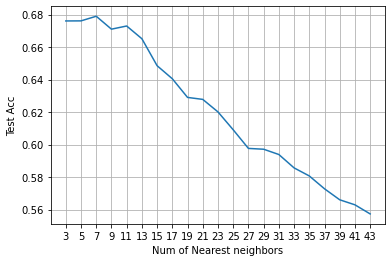

In [95]:
plt.plot(list(range(3,45,2)),test_acc)
plt.xlabel('Num of Nearest neighbors')
plt.ylabel('Test Acc')
plt.xticks(list(range(3,45,2)))
plt.grid()
plt.show()